<a href="https://colab.research.google.com/github/Mustasheep/Wine-Quality-EDA/blob/main/Dataset_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importanto dataset do kaggle
import kagglehub
import os

path = kagglehub.dataset_download("sh6147782/winequalityred")

100%|██████████| 24.1k/24.1k [00:00<00:00, 8.03MB/s]

Extracting files...


In [4]:
# Função para separar resultados
def jumplin():
    print('\n')
    print('='*80)
    print('\n')

In [5]:
file_path = os.path.join(path, 'winequality-red.csv')
df = pd.read_csv(file_path)

In [6]:
# Número de linhas e colunas
df.shape

(1596, 12)

In [7]:
# Tipos de dados
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1) Observar e estudar a distribuição das variáveis numéricas, calculando, para cada coluna, as principais estatísticas descritivas de posição (média, mediana, quartis, etc.) e de dispersão (desvio padrão, intervalo interquartil, etc.).


In [10]:
df_desc = df.describe()
df_desc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [11]:
# Calculando o intervalo interquartil (IQR)
df_desc.loc['iqr'] = df_desc.loc['75%'] - df_desc.loc['25%']
df_desc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000
iqr,2.100000,0.250000,0.330000,0.700000,0.020000,14.000000,40.000000,0.002232,0.190000,0.180000,1.600000,1.000000


## Outliers

2) Verificar presença de outliers.

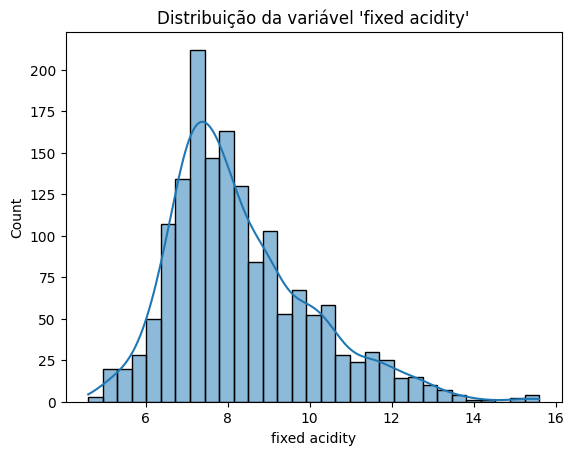

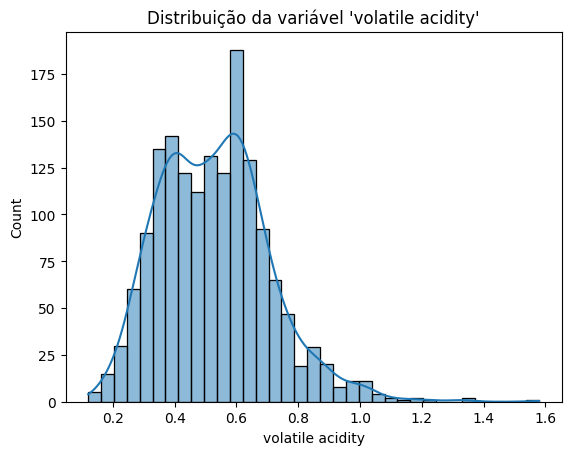

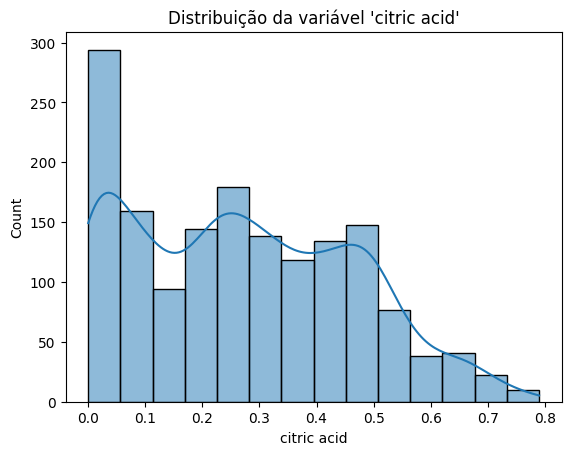

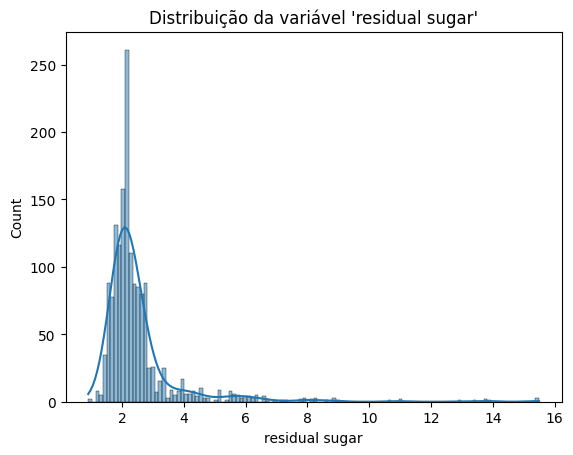

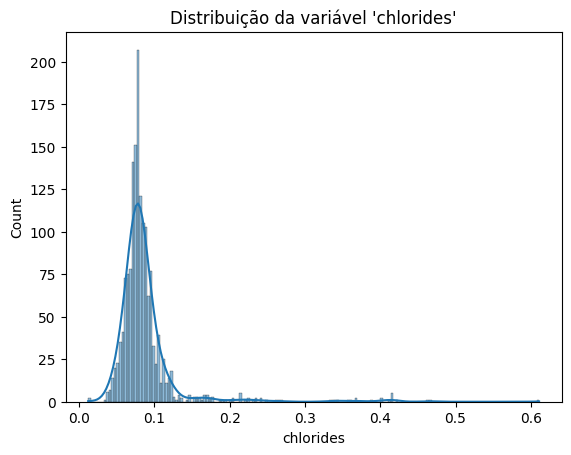

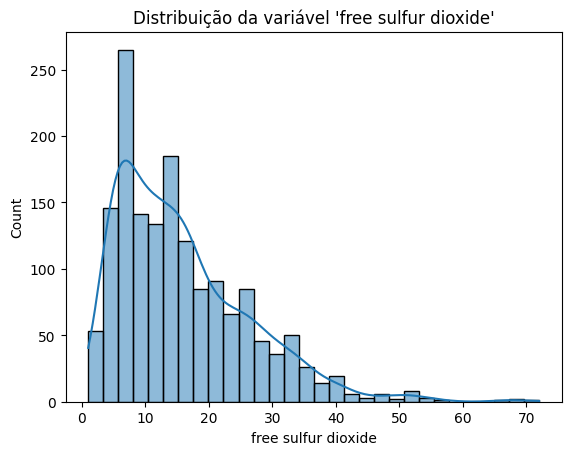

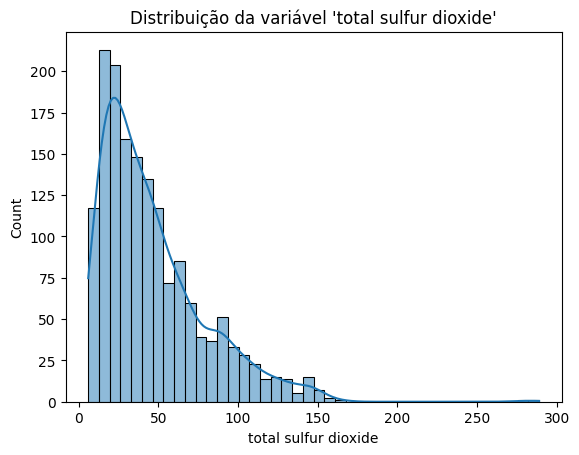

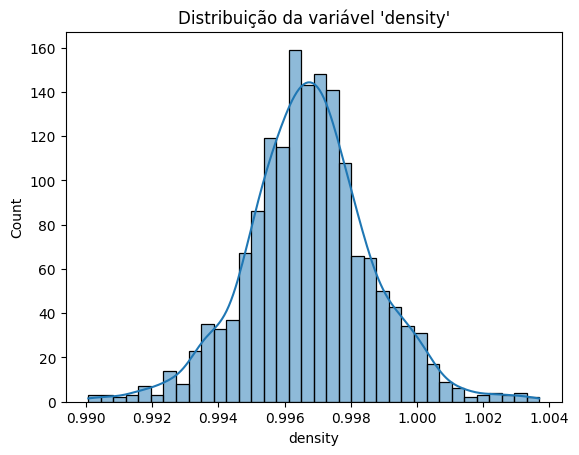

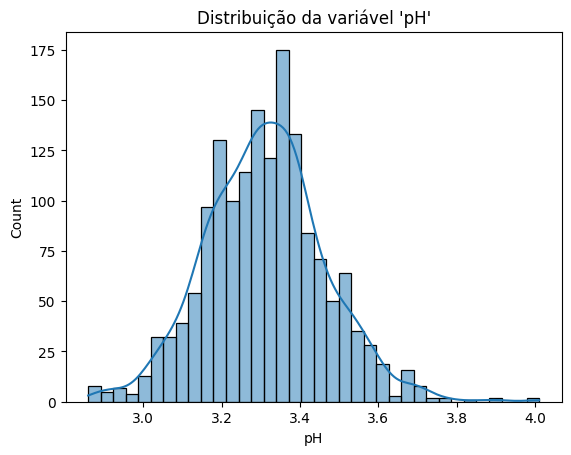

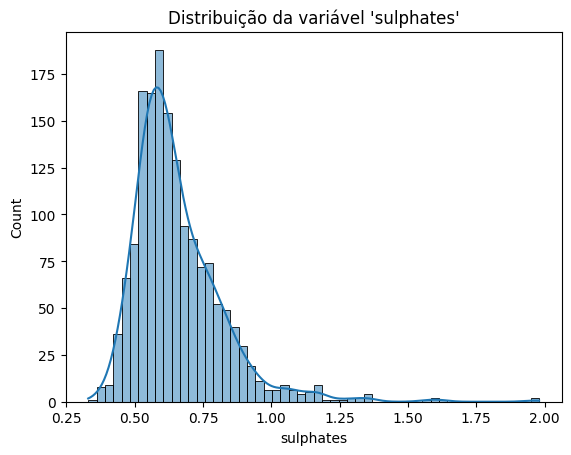

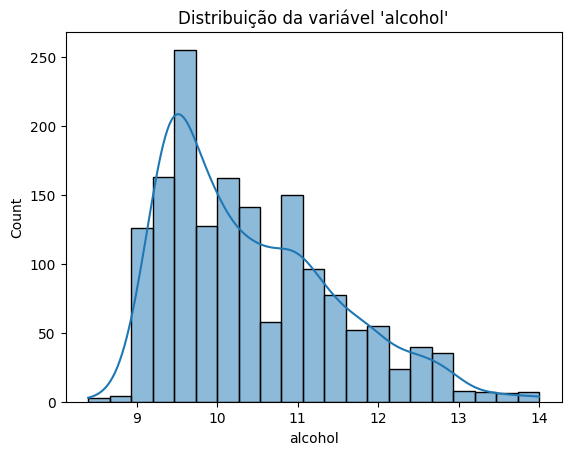

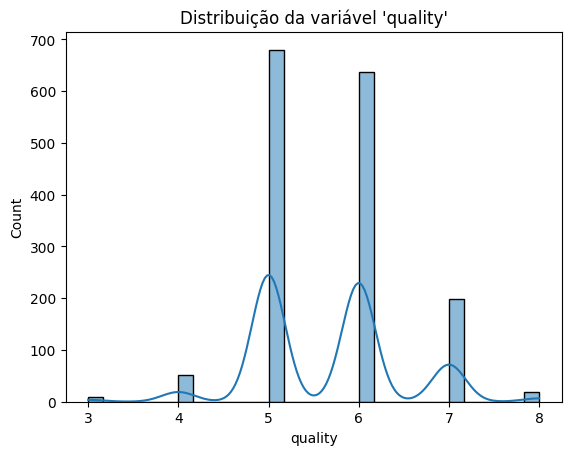

In [12]:
# Visualizando a distribuição das colunas com histogramas para gerar uma intuição quanto aos outliers
for col in df:
  sns.histplot(data=df, x=col, kde=True).set_title(f"Distribuição da variável '{col}'")
  plt.show()
  jumplin()

Pode-se notar um número bem grande de outliers em `residual sugar e chlorides`.

In [13]:
# Formulando uma análise mais precisa apresentando os outliers de cada coluna

for col in df.drop(columns='quality'):

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  aux_outliers = df[(df[col] < Q1 - (1.5 * IQR)) | (df[col] > Q3 + (1.5 * IQR))]

  indices_outliers = aux_outliers.index.tolist()

  if len(indices_outliers) > 0:
    print(f"A coluna '{col}' possui {len(indices_outliers)} outliers")
    print("\nOs índices deles são:\n")
    print(indices_outliers)

  else:
    print(f"A coluna '{col}' não possui outliers")
  jumplin()

A coluna 'fixed acidity' possui 48 outliers

Os índices deles são:

[203, 204, 241, 242, 262, 292, 326, 336, 337, 345, 351, 357, 361, 362, 364, 372, 379, 389, 392, 407, 427, 438, 440, 444, 468, 470, 507, 508, 514, 536, 542, 546, 552, 553, 555, 557, 558, 562, 563, 594, 597, 599, 601, 609, 677, 808, 811, 1221]




A coluna 'volatile acidity' possui 19 outliers

Os índices deles são:

[38, 93, 119, 125, 126, 133, 197, 551, 669, 687, 697, 702, 707, 721, 896, 1258, 1296, 1309, 1464]




A coluna 'citric acid' não possui outliers




A coluna 'residual sugar' possui 154 outliers

Os índices deles são:

[9, 11, 14, 15, 18, 33, 35, 39, 40, 55, 57, 64, 65, 152, 153, 154, 155, 161, 162, 190, 213, 267, 268, 269, 270, 272, 273, 275, 276, 277, 281, 322, 323, 325, 351, 362, 364, 372, 373, 376, 393, 394, 398, 406, 407, 411, 413, 440, 453, 478, 482, 492, 499, 500, 508, 513, 514, 536, 537, 539, 552, 553, 554, 555, 556, 557, 562, 593, 604, 606, 622, 623, 643, 647, 656, 687, 702, 716, 737, 797, 875, 881,

# Estudo da variável resposta

3) Observar e estudar a coluna `quality`, que é a variável resposta do problema.

* Essa é uma variável contínua ou discreta?
* Como as notas estão distribuídas? Quais as notas mais/menos comuns?
* Faz sentido discretizar esta variável em dois níveis categóricos?

    * Se sim, qual seria o valor de corte, e, com este corte, qual é o significado de cada nível categórico?
    * Como estes dois níveis categóricos estão distribuídos?

In [14]:
df['quality'].value_counts(normalize=True)

,proportion
quality,
5,0.426065
6,0.399123
7,0.124687
4,0.032581
8,0.011278
3,0.006266


* _Pode-se observar que temos qualidades entre `3 a 8` , não havendo uma qualidade minimamente ruím ou a melhor de todas (como por exemplo `1 e 2` ou `9 e 10`)_

* _Cerca de 94% das proporções de qualidades são com as notas `5, 6 e 7`._

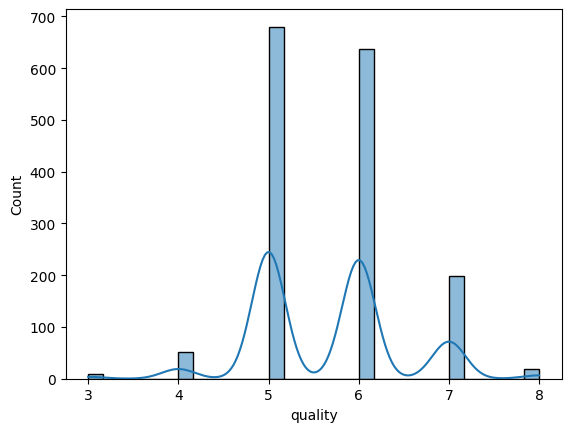

In [15]:
# Representação gráfica das proporções
sns.histplot(data=df, x='quality', kde=True)
plt.show()

--------------
4) Buscar a correlação das variáveis descritivas `fixed acidity, dioxide, sulphates` , etc. com a variável resposta `quality` para encontrar algumas que podem influenciar mais.

In [16]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255155,0.673008,0.106105,0.093876,-0.157011,-0.116725,0.670895,-0.685062,0.185061,-0.073644,0.127766
volatile acidity,-0.255155,1.000000,-0.554503,0.003957,0.064332,-0.010077,0.077515,0.022390,0.235119,-0.269707,-0.201160,-0.391735
citric acid,0.673008,-0.554503,1.000000,0.139208,0.185893,-0.065745,0.033206,0.363162,-0.537645,0.306241,0.108285,0.233733
residual sugar,0.106105,0.003957,0.139208,1.000000,0.053401,0.186203,0.203252,0.355503,-0.081154,0.002378,0.033380,0.016464
chlorides,0.093876,0.064332,0.185893,0.053401,1.000000,-0.005569,0.043551,0.197957,-0.250010,0.339910,-0.224965,-0.119770
free sulfur dioxide,-0.157011,-0.010077,-0.065745,0.186203,-0.005569,1.000000,0.668426,-0.023672,0.076000,0.043461,-0.070382,-0.048641
total sulfur dioxide,-0.116725,0.077515,0.033206,0.203252,0.043551,0.668426,1.000000,0.070240,-0.060311,0.027173,-0.208148,-0.185404
density,0.670895,0.022390,0.363162,0.355503,0.197957,-0.023672,0.070240,1.000000,-0.340093,0.145326,-0.499736,-0.173251
pH,-0.685062,0.235119,-0.537645,-0.081154,-0.250010,0.076000,-0.060311,-0.340093,1.000000,-0.173073,0.211157,-0.063373
sulphates,0.185061,-0.269707,0.306241,0.002378,0.339910,0.043461,0.027173,0.145326,-0.173073,1.000000,0.102423,0.270777


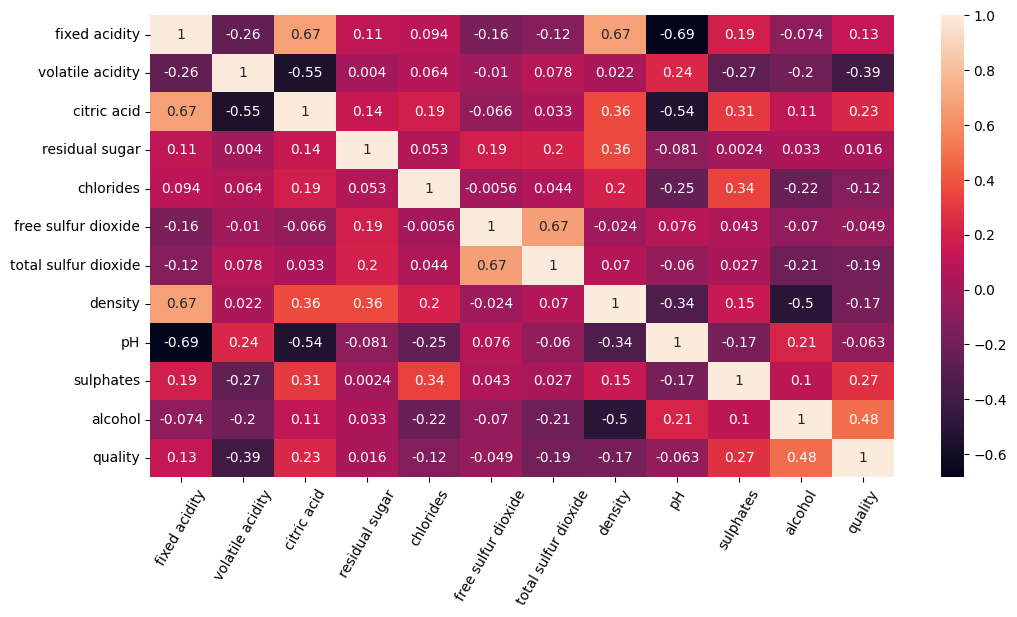

In [17]:
# Representação gráfica da correlação

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=60)
plt.show()

No gráfico, irei analisar apenas as correlações presente com a variável `quality`.

* _Pode-se notar que existe uma correlação positiva média com `alcohol` e negativa relativamente média com `volatile acidity`._

* _Também possui correlações fracas com `sulphates, citric acid e total sulfur dioxide`._

In [18]:
df.corr()['quality'].sort_values().head(4)

,quality
volatile acidity,-0.391735
total sulfur dioxide,-0.185404
density,-0.173251
chlorides,-0.119770


In [19]:
df.corr()['quality'].sort_values().tail(5)

,quality
fixed acidity,0.127766
citric acid,0.233733
sulphates,0.270777
alcohol,0.480738
quality,1.000000


---------
4) Calcular e visualizar o intervalo de confiança de 90% para a média de cada uma das variáveis físico-químicas, agrupadas pelos níveis categóricos da variável resposta `quality`.


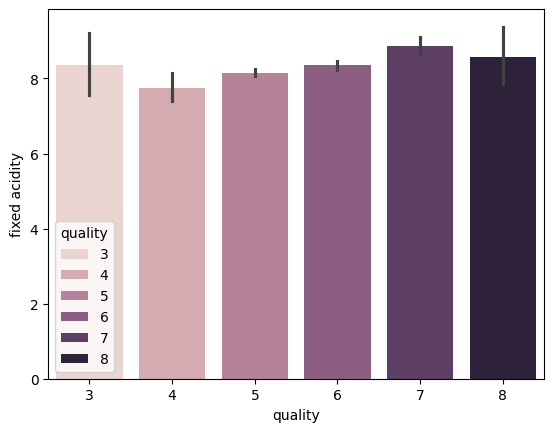

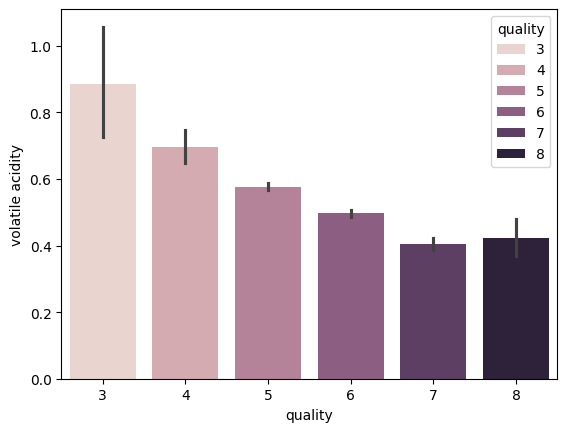

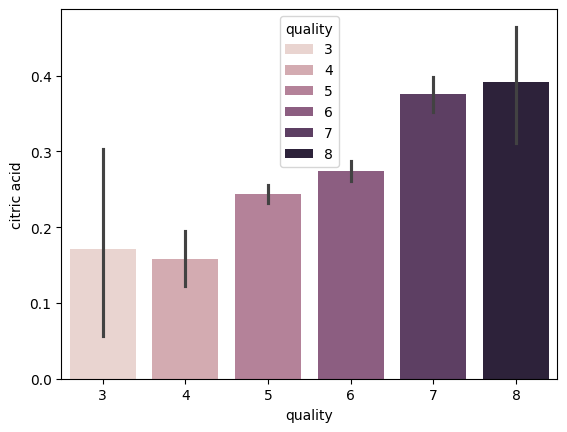

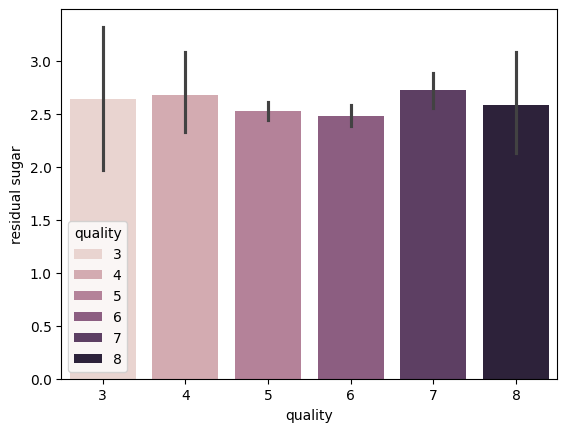

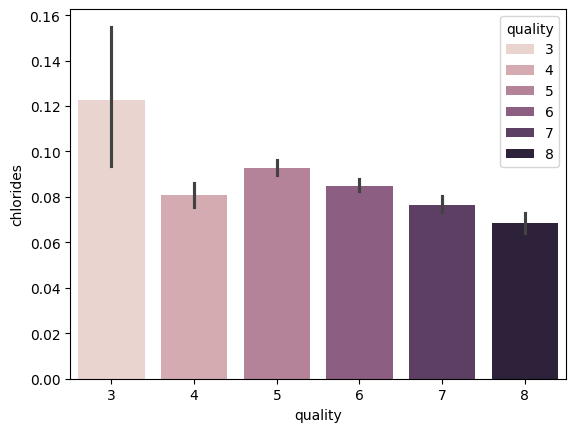

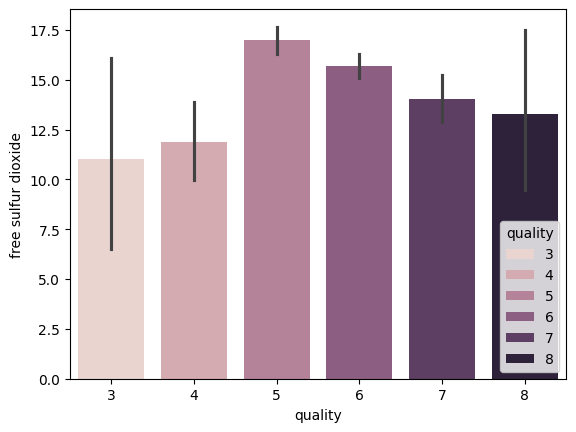

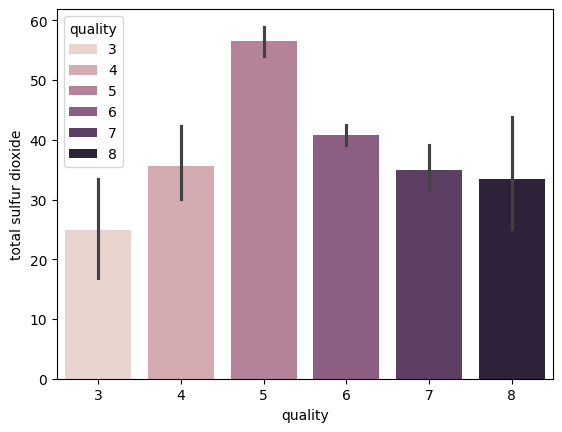

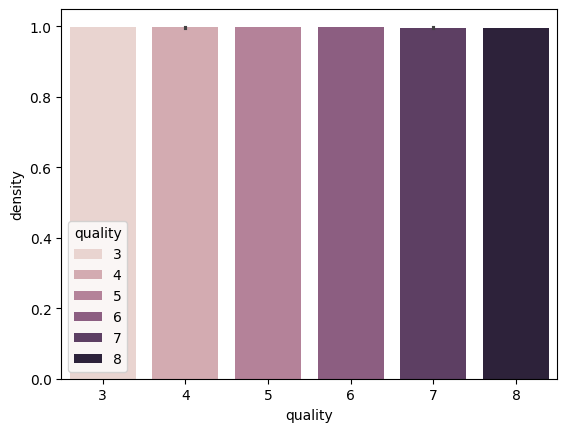

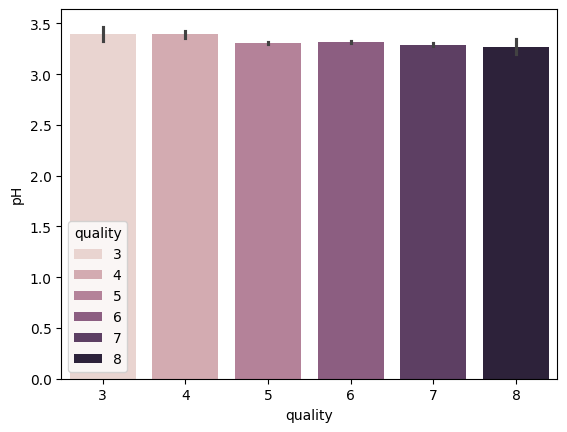

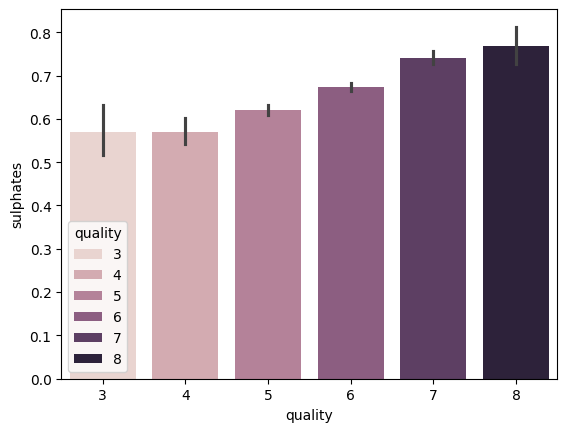

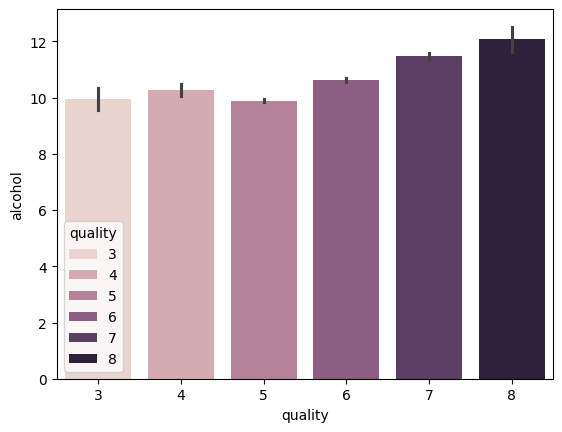

In [20]:
for col in df.drop(columns='quality'):
  sns.barplot(data=df, x='quality', y=col, errorbar=('ci', 90), hue='quality')
  plt.show()
  jumplin()

In [21]:
df['quality_bin'] = df['quality'].apply(lambda x: 'bad' if x <= 5 else 'good')

In [22]:
df_bin = df.drop(columns=['quality'])
df_bin

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [23]:
# Gerar um novo CSV para ser trabalho a partir das conclusões ocorridas

df_bin.to_csv('winequality-red-binary.csv', index=False)

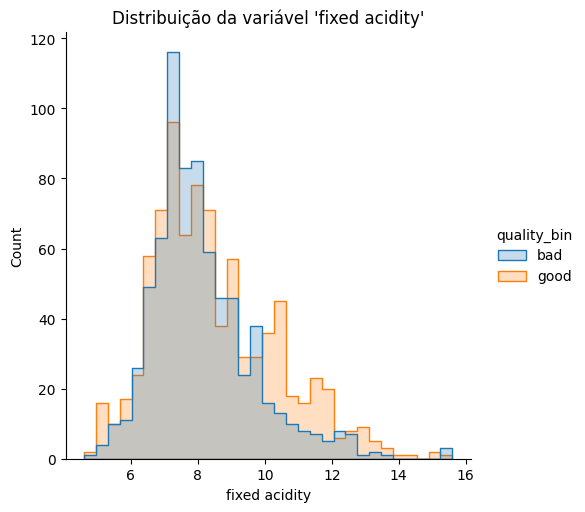

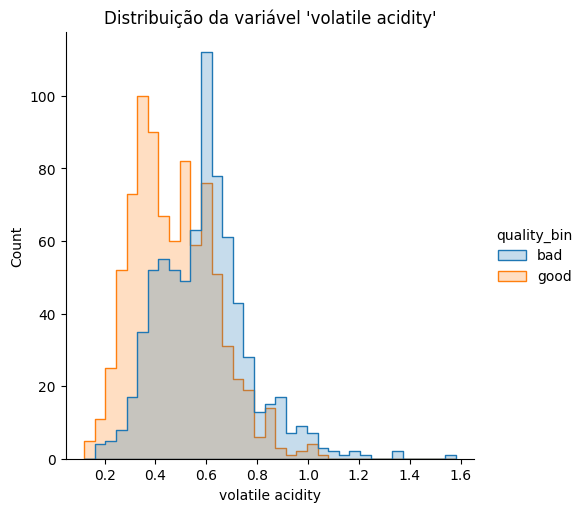

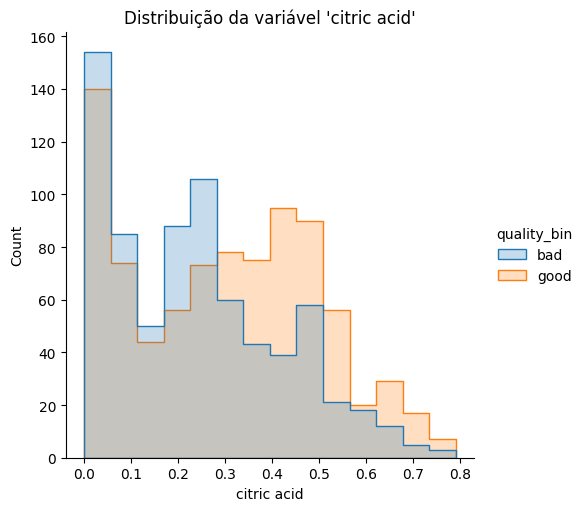

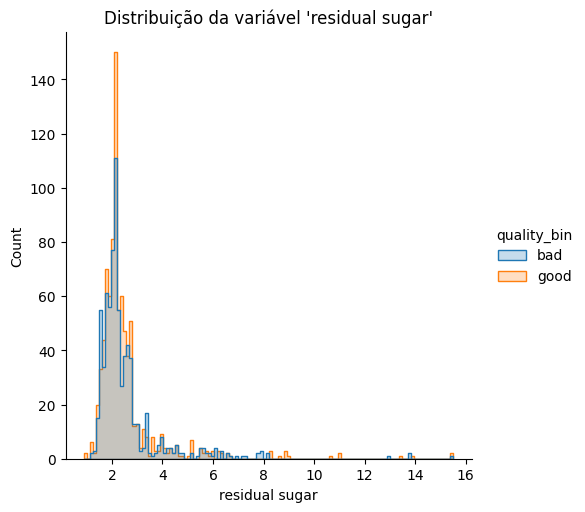

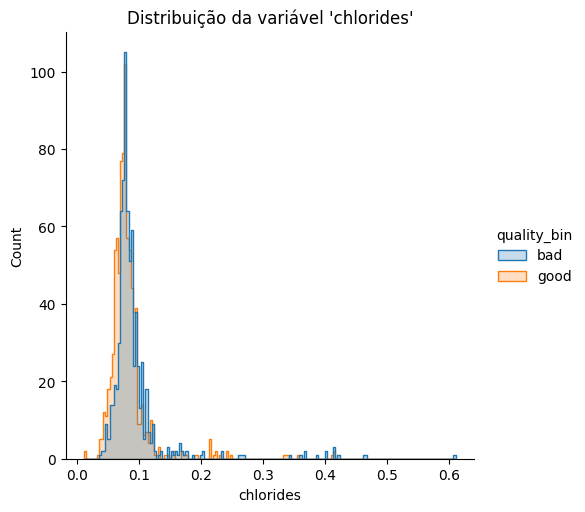

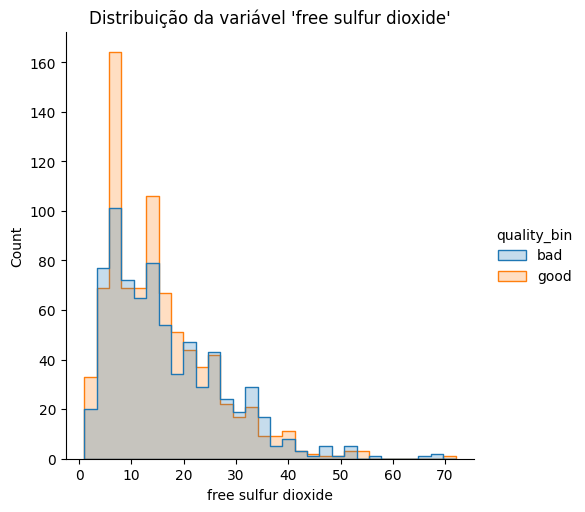

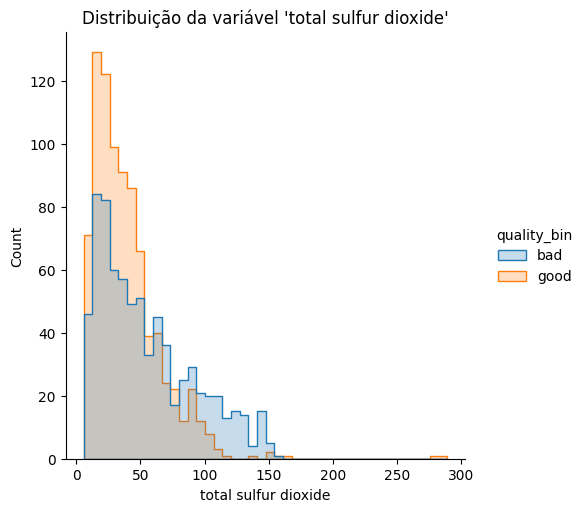

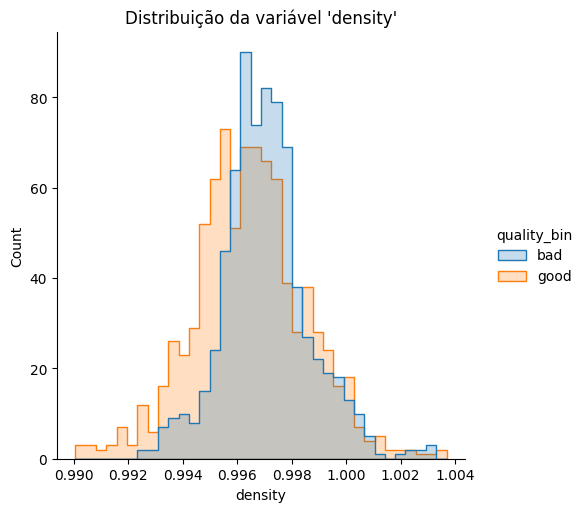

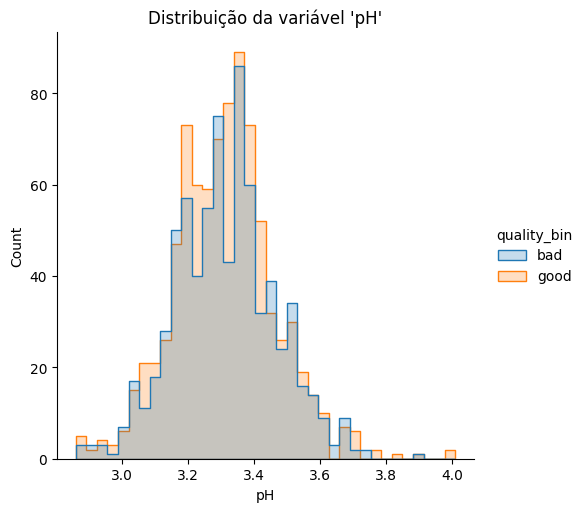

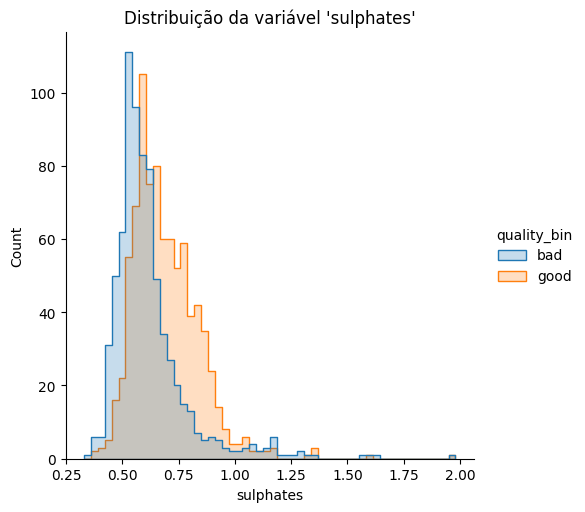

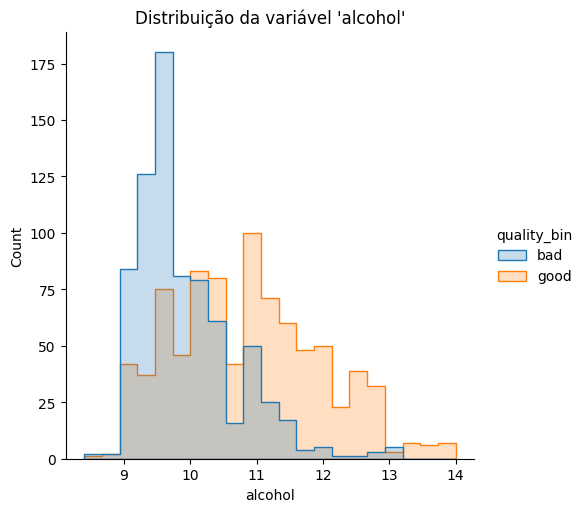

In [26]:
for col in df_bin.drop(columns='quality_bin'):
  g = sns.displot(data=df_bin, x=col, hue=df_bin['quality_bin'], element='step')
  g.set(title=f"Distribuição da variável '{col}'")
  plt.show()
  jumplin()